![Vanguard](datasets/vanguard.png) 
# ASSET BACKED SECURITIES - AUTO FINANCE LOANS

### What is an Asset-Backed Security
An asset-backed security (ABS) is a financial security collateralized by a pool of assets such as loans, leases, credit card debt, royalties or receivables. For investors, asset-backed securities are an alternative to investing in corporate debt. An ABS is similar to a mortgage-backed security, except that the underlying securities are not mortgage-based.

Asset-backed securities allow issuers to generate more cash, which, in turn, is used for more lending while giving investors the opportunity to invest in a wide variety of income-generating assets. Usually, the underlying assets of an ABS are illiquid and can't be sold on their own. But pooling the assets together and creating a financial security, a process called securitization, enables the owner of the assets to make them marketable. The underlying assets of these pools may be home equity loans, automobile loans, credit card receivables, student loans or other expected cash flows. Issuers of ABS can be as creative as they desire. For example, ABS have been created based on cash flows from movie revenues, royalty payments, aircraft leases and solar photovoltaics. Just about any cash-producing situation can be securitized into an ABS.

### Example of Asset-Backed Security
Assume that Company X is in the business of making automobile loans. If a person wants to borrow money to buy a car, Company X gives that person the cash, and the person is obligated to repay the loan with a certain amount of interest. Perhaps Company X makes so many loans that it runs out of cash to continue making more loans. Company X can then package its current loans and sell them to Investment Firm X, thus receiving cash that it can use to make more loans.

Investment Firm X will then sort the purchased loans into different groups called tranches. These tranches are groups of loans with similar characteristics, such as maturity, interest rate and expected delinquency rate. Next, Investment Firm X will issue securities that are similar to typical bonds on each tranche it creates.

Individual investors then purchase these securities and receive the cash-flows from the underlying pool of auto loans, minus an administrative fee that Investment Firm X keeps for itself.

### Typical Tranches
Usually an ABS will have three tranches: class A, B and C. The senior tranche, A, is almost always the largest tranche and is structured to have an investment-grade rating to make it attractive to investors.

The B tranche has lower credit quality and thus has a higher yield than the senior tranche. The C tranche has a lower credit rating than the B tranche and might have such poor credit quality that it can't be sold to investors. In this case, the issuer would keep the C tranche and absorb the losses.


### Vanguard Use Case 
To predict loan default based on public data from SEC and additional economic data

![Auto Loans](datasets/saupload_US-auto-loans-2017-Q1.png)

### Import Libraries

In [ ]:
import re
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__
%matplotlib inline

import seaborn as sns
import itertools
import operator
import collections
from scipy.io import mmread, mmwrite
from random import randint
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import scipy.stats as stats
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.gaussian_process import GaussianProcess
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

### Model Name

In [2]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

### Default Parameters

In [3]:
#parameters to choose
default_days = 0
nrows = 20000000
train_split = 0.80
model_type = keras
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000
cutOffForOriginationDate='2012-01-01'
manualOversamplingFactor=0.0
epochs=1

### Features to Be Used from Data

In [4]:
# columns to be used
use_list=[
    'abs_loan.cik',
 #'abs_loan.accessionnumber',
 #'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 #'interestcalculationtypecode',
 #'originalinterestratetypecode',
 #'originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 #'paymenttypecode',
 'abs_loan.subvented',
 #'vehiclemanufacturername',
 #'vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 #'vehiclemodelyear',
 'abs_loan.vehicletypecode',
 #'vehiclevalueamount',
 #'vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 #'obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 #'remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 #'primaryloanservicername',
 #'mostrecentservicingtransferreceiveddate',
 #'assetsubjectdemandindicator',
 #'assetsubjectdemandstatuscode',
 #'repurchaseamount',
 #'demandresolutiondate',
 #'repurchasername',
 #'repurchasereplacementreasoncode',
 #'chargedoffprincipalamount',
 #'recoveredamount',
 #'modificationtypecode',
 #'paymentextendednumber',
 #'repossessedindicator',
 #'repossessedproceedsamount'
]

### GPU Options

In [6]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

### Load data

In [7]:
#load data from tab delimited file
df=pd.read_csv(path+'datasets/abs_loan.csv', 
               usecols=use_list, 
               sep='\t',
               #compression=bz2,
               nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.reportingperiodendingdate', 
               parse_dates=True
              )

#remove 'abs_loan.' string from columns because 'dot' is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

#display data shape
print(df.shape)
#view first five rows of all columns
#df.head(n=5)

(20000000, 47)


In [ ]:
### Analyse and Delete Duplicate Data

In [8]:
#df.cik.unique()

In [9]:
#df.assetnumber.unique()

In [10]:
#df.loc[:,~df.columns.str.contains('^Unnamed')]

In [11]:
#df.duplicated(subset=['cik','assetnumber']).sum()

In [12]:
#df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']).sum()

In [13]:
df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate','originationdate']).sum()

941375

In [14]:
#df.loc[df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']),:]

In [15]:
df.duplicated().sum()

941375

In [16]:
df.drop_duplicates(subset=['cik','assetnumber','reportingperiodendingdate','originationdate'],keep='last', inplace=True)

In [17]:
#df.columns.tolist()
df.shape

(19058625, 47)

### Dataframe Memory Usage and Datatypes

In [18]:
#df.info(memory_usage='deep')

In [19]:
df.memory_usage(deep=True).sum()

In [20]:
df.dtypes

In [21]:
#df.head()
#df=df.sort_values(by='originationdate', ascending=True)

### Function to Draw Bar chart

In [22]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False, n=-1):
    labels = pd.value_counts(data).head().index.tolist()
    count_classes = pd.value_counts(data, sort).head()
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print('Top ',n,' counts: ','\n',pd.value_counts(data, sort).head(n))

### Reporting Period
we have taken reportingperiodendingdate as a proxy for the reporting period

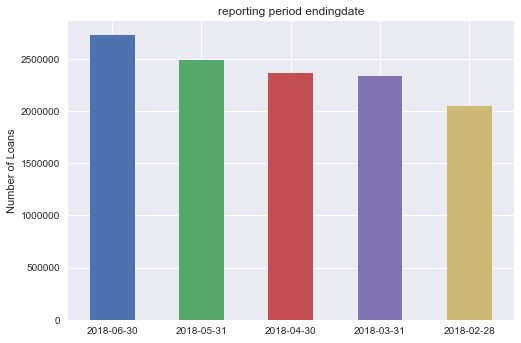

Top  100  counts:  
 2018-06-30    2725595
2018-05-31    2482372
2018-04-30    2365953
2018-03-31    2329102
2018-02-28    2049567
2018-08-31    1857601
2018-07-31    1817977
2017-12-31    1632052
2018-09-30    1053343
2017-02-28     222939
2017-01-31     180685
2016-12-31     163272
2017-03-31      75737
2017-11-30      55710
2018-01-31      46720
Name: reportingperiodendingdate, dtype: int64


In [23]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True, n=100)

In [24]:
# restrict data to a reporting period
#df=df[df.index=='2017-11-30']

### Mean current deliquency days for the reporting period

In [25]:
df.groupby(df.reportingperiodendingdate).currentdelinquencystatus.mean()

reportingperiodendingdate
2016-12-31     0.652984
2017-01-31     0.927592
2017-02-28     0.406032
2017-03-31     0.527338
2017-11-30     0.242685
2017-12-31     4.131805
2018-01-31     0.538368
2018-02-28     4.193042
2018-03-31     3.995102
2018-04-30     4.570131
2018-05-31     5.065113
2018-06-30     5.274703
2018-07-31     0.888630
2018-08-31     9.800966
2018-09-30    19.122567
Name: currentdelinquencystatus, dtype: float64

### Mean reporting period ending balance

In [26]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean()

reportingperiodendingdate
2016-12-31    20399.176618
2017-01-31    18017.950731
2017-02-28    18210.210585
2017-03-31    18459.045384
2017-11-30    26108.681083
2017-12-31    16159.438908
2018-01-31    22312.621633
2018-02-28    16128.891206
2018-03-31    15795.719431
2018-04-30    15911.255808
2018-05-31    15607.088079
2018-06-30    16072.683320
2018-07-31    15446.794767
2018-08-31    16585.179272
2018-09-30    16539.659496
Name: reportingperiodactualendbalanceamount, dtype: float64

### Creating Feature columns for Reporting period

In [27]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))
        print('Added Column for :   reportingperiodending_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   reportingperiodending_2018-06-30
Added Column for :   reportingperiodending_2018-05-31
Added Column for :   reportingperiodending_2018-04-30
Added Column for :   reportingperiodending_2018-03-31
Added Column for :   reportingperiodending_2018-02-28
Added Column for :   reportingperiodending_2018-08-31
Added Column for :   reportingperiodending_2018-07-31
Added Column for :   reportingperiodending_2017-12-31
Added Column for :   reportingperiodending_2018-09-30
Added Column for :   reportingperiodending_2017-02-28
Added Column for :   reportingperiodending_2017-01-31
Added Column for :   reportingperiodending_2016-12-31
Added Column for :   reportingperiodending_2017-03-31
Added Column for :   reportingperiodending_2017-11-30
Added Column for :   reportingperiodending_2018-01-31
New Dataframe shape :  (19058625, 62)


### Calculating Number of Days Loans Outstanding and creating a feature column

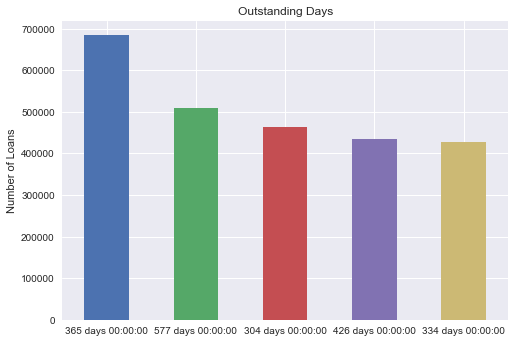

Top  5  counts:  
 365 days    684888
577 days    509028
304 days    463524
426 days    435325
334 days    426654
Name: outstandingdays, dtype: int64


In [28]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True, n=5)
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
#df.outstandingdays.tail()

### Dropping Loans Below Zero Outstanding Days

In [29]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]   

No Loans Below zero outstanding days


In [30]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    1.905862e+07
mean     6.265682e+02
std      5.082218e+02
min      0.000000e+00
25%      2.730000e+02
50%      4.870000e+02
75%      7.910000e+02
max      2.891000e+03
Name: outstandingdays, dtype: float64

### Mean outstanding days for the reporting period

In [31]:
df.groupby(df.reportingperiodendingdate).outstandingdays.mean()

reportingperiodendingdate
2016-12-31    335.460704
2017-01-31    448.813178
2017-02-28    426.975513
2017-03-31     90.684276
2017-11-30    397.635810
2017-12-31    608.631583
2018-01-31    439.978275
2018-02-28    636.448613
2018-03-31    645.670708
2018-04-30    642.369171
2018-05-31    657.758767
2018-06-30    646.421271
2018-07-31    745.665424
2018-08-31    573.932290
2018-09-30    496.573196
Name: outstandingdays, dtype: float64

### Calculate Number of Days Left until Maturity

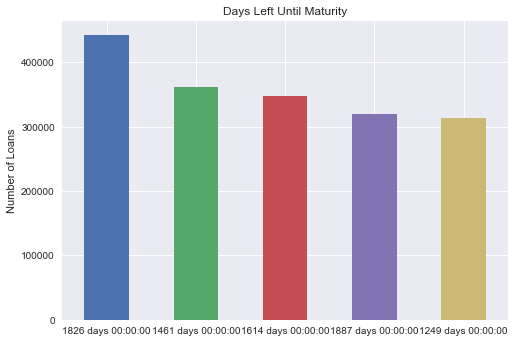

Top  5  counts:  
 1826 days    442155
1461 days    361630
1614 days    347944
1887 days    319319
1249 days    313355
Name: daystomaturity, dtype: int64


In [32]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True, n=5)

### Create Feature Column for Days to Maturity

In [33]:
# remove 'days' string from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

19999995    1917.0
19999996    2101.0
19999997    1006.0
19999998    2101.0
19999999    1736.0
Name: daystomaturity, dtype: float64

In [34]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.daystomaturity>0]

Number of Loans with negative outstanding days : 128141
Dropping  128141 rows and retaining loans with only non-negative outstanding days


In [35]:
#number of rows and columns of the dataframe
df.shape

(18920357, 64)

In [36]:
# statistics for days to maturity
df.daystomaturity.describe()

count    1.892036e+07
mean     1.411961e+03
std      5.595943e+02
min      2.800000e+01
25%      1.096000e+03
50%      1.522000e+03
75%      1.857000e+03
max      7.944000e+03
Name: daystomaturity, dtype: float64

### Mean Number of days to Maturity for the Reporting Period

In [37]:
df.groupby(df.reportingperiodendingdate).daystomaturity.mean()

reportingperiodendingdate
2016-12-31    1647.118881
2017-01-31    1559.017882
2017-02-28    1529.274824
2017-03-31    1900.921452
2017-11-30    1482.041537
2017-12-31    1418.761027
2018-01-31    1674.368001
2018-02-28    1387.471826
2018-03-31    1381.950439
2018-04-30    1388.913122
2018-05-31    1377.087996
2018-06-30    1395.242479
2018-07-31    1243.197945
2018-08-31    1507.814053
2018-09-30    1674.412331
Name: daystomaturity, dtype: float64

In [38]:
df.drop(['loanmaturitydate'], axis=1, inplace=True)

### Origination Date - Removing loans before origination cutoff date

In [39]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOffForOriginationDate )
else: 
    print('Number of rows before',cutOffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOffForOriginationDate)
    df=df[df.originationdate>cutOffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

Number of rows before 2012-01-01 : 11110
Dropping  11110 rows and retaining loans with origination dates after 2012-01-01


(18909247, 63)

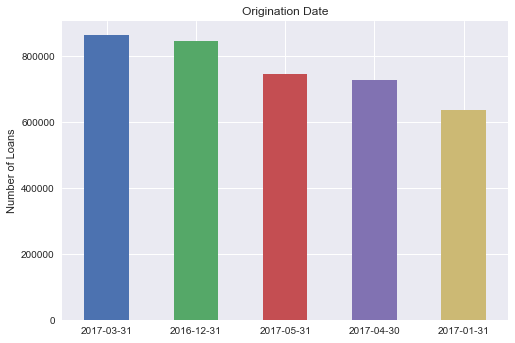

Top  10  counts:  
 2017-03-31    863029
2016-12-31    844636
2017-05-31    745833
2017-04-30    725811
2017-01-31    637323
2016-10-31    626780
2016-11-30    625085
2016-08-31    618780
2017-08-31    598204
2016-09-30    597786
Name: originationdate, dtype: int64


In [40]:
#set origination date as index
#df.set_index(['originationdate'])
# draw origination date chart
draw(df.originationdate, title='Origination Date', ylabel='Number of Loans', sort=True, n=10)

In [41]:
# statistics for origination date
df.originationdate.describe()

count       18909247
unique            81
top       2017-03-31
freq          863029
Name: originationdate, dtype: object

### Top ten mean current deliquency status by origination date and reporting period

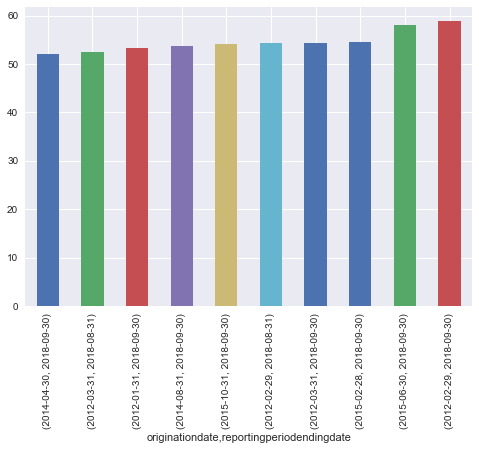

In [42]:
df.groupby([df.originationdate, df.reportingperiodendingdate]).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

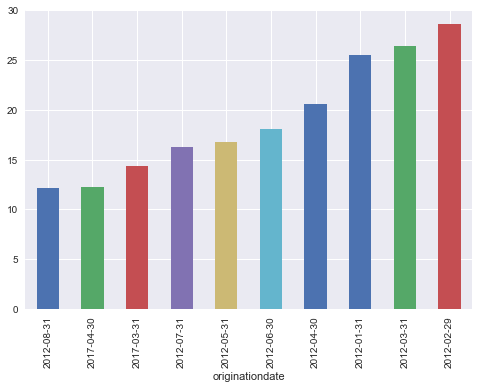

In [43]:
df.groupby(df.originationdate).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

### Originators Name

In [44]:
df.originatorname.unique()

array(['BMW Bank of North America', 'BMW Financial Services NA LLC', 'SC',
       'Mechanics Bank', 'TMCC', 'AHFC',
       'USAAFSB                                           ', 'NMAC',
       'Fifth Third Bank', 'VW Credit',
       'MBFS USA LLC                                      ', 'Ford Credit',
       'HCA', 'WORLD OMNI FINANCIAL CORP', 'CBS'], dtype=object)

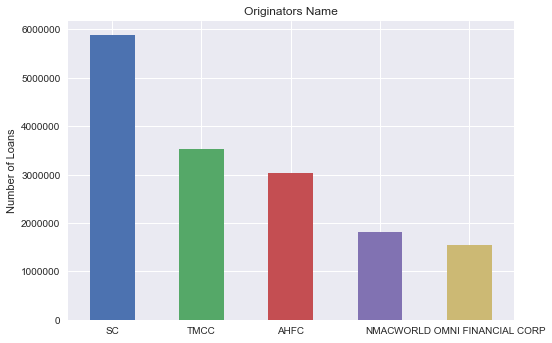

Top  -1  counts:  
 SC                                                    5882726
TMCC                                                  3536459
AHFC                                                  3029796
NMAC                                                  1805919
WORLD OMNI FINANCIAL CORP                             1536039
HCA                                                   1090356
BMW Bank of North America                              426891
Fifth Third Bank                                       310976
CBS                                                    297607
Mechanics Bank                                         284360
USAAFSB                                                227457
VW Credit                                              207888
Ford Credit                                            171831
MBFS USA LLC                                           100589
Name: originatorname, dtype: int64


In [45]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

### Create Features for Originators

In [46]:
df['originatorname']=df.originatorname.astype('category')

In [47]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))
        print('Added Column for :   originator_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   originator_SC
Added Column for :   originator_TMCC
Added Column for :   originator_AHFC
Added Column for :   originator_NMAC
Added Column for :   originator_WORLD OMNI FINANCIAL CORP
Added Column for :   originator_HCA
Added Column for :   originator_BMW Bank of North America
Added Column for :   originator_Fifth Third Bank
Added Column for :   originator_CBS
Added Column for :   originator_Mechanics Bank
Added Column for :   originator_USAAFSB                                           
Added Column for :   originator_VW Credit
Added Column for :   originator_Ford Credit
Added Column for :   originator_MBFS USA LLC                                      
Added Column for :   originator_BMW Financial Services NA LLC
New Dataframe shape :  (18909247, 78)


In [48]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

(18909247, 77)

### Original Loan Amount

In [49]:
df.groupby(df.reportingperiodendingdate).originalloanamount.mean()


reportingperiodendingdate
2016-12-31    24338.764833
2017-01-31    23130.747803
2017-02-28    23371.975696
2017-03-31    19392.967107
2017-11-30    33782.069528
2017-12-31    23356.855044
2018-01-31    27952.585437
2018-02-28    23977.500993
2018-03-31    23782.480131
2018-04-30    23927.268019
2018-05-31    23825.206457
2018-06-30    24252.522997
2018-07-31    25729.183819
2018-08-31    23324.530212
2018-09-30    20759.268733
Name: originalloanamount, dtype: float64

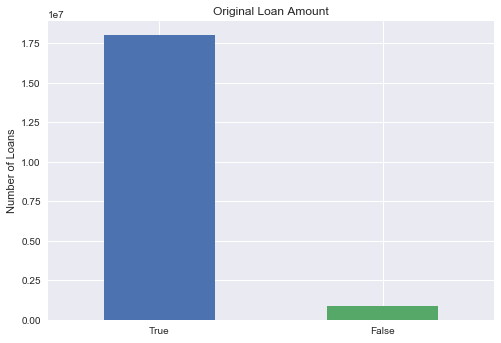

Top  -1  counts:  
 True    18027645
Name: originalloanamount, dtype: int64


In [50]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

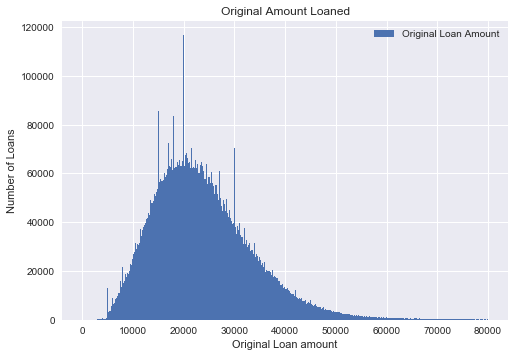

In [51]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 80000, 1000)
plt.hist(df.originalloanamount, bins, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Number of Loans')
plt.show()

In [52]:
# get statistics for original loan amount
df.originalloanamount.describe()

count    1.890925e+07
mean     2.384596e+04
std      1.015794e+04
min      7.209300e+02
25%      1.668617e+04
50%      2.245584e+04
75%      2.934815e+04
max      2.432811e+05
Name: originalloanamount, dtype: float64

### Remove Original Loan Amount Below Zero

In [53]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(18909247, 77)

### Original Loan Term

In [54]:
df.groupby(df.reportingperiodendingdate).originalloanterm.mean()

reportingperiodendingdate
2016-12-31    65.981788
2017-01-31    66.029206
2017-02-28    65.127003
2017-03-31    66.135396
2017-11-30    61.347819
2017-12-31    66.506458
2018-01-31    70.416080
2018-02-28    66.403083
2018-03-31    66.517867
2018-04-30    66.545312
2018-05-31    66.585709
2018-06-30    66.843201
2018-07-31    65.427173
2018-08-31    67.616598
2018-09-30    70.013053
Name: originalloanterm, dtype: float64

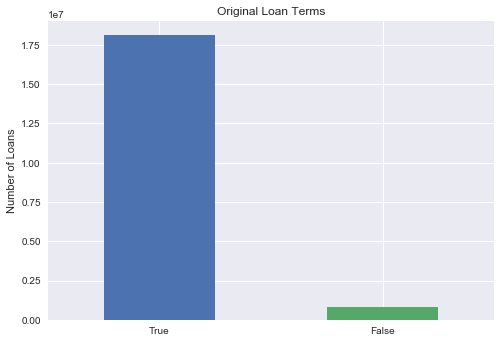

Top  -1  counts:  
 True    18121590
Name: originalloanterm, dtype: int64


In [55]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

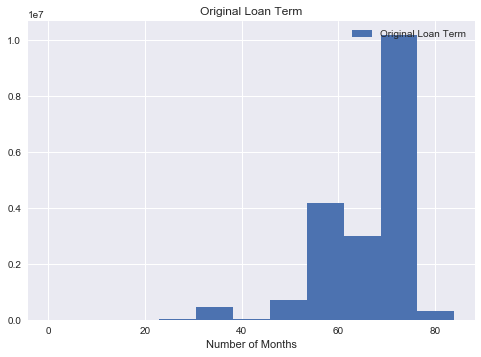

In [56]:
#chart for the distribution of original loan term
bins = np.linspace(0, 84, 12)
plt.hist(df.originalloanterm, bins, label='Original Loan Term')
plt.legend(loc='upper right')
plt.title("Original Loan Term")
plt.xlabel('Number of Months')
#plt.ylabel('Number of Loans')
plt.show()

In [57]:
#statistics for original loan term
df.originalloanterm.describe()

count    1.890925e+07
mean     6.672788e+01
std      8.459095e+00
min      1.200000e+01
25%      6.100000e+01
50%      7.200000e+01
75%      7.300000e+01
max      8.600000e+01
Name: originalloanterm, dtype: float64

In [58]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

No original loan term blank or below zero


(18909247, 77)

### Original interest rate percentage

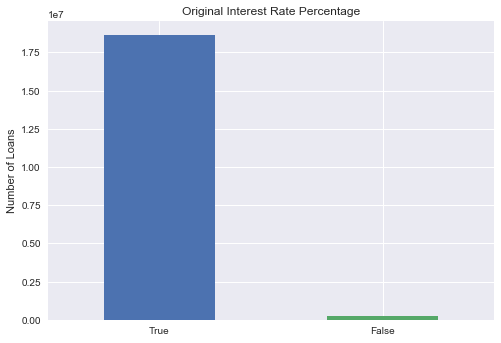

Top  -1  counts:  
 True    18637835
Name: originalinterestratepercentage, dtype: int64


In [59]:
# draw a chart with a filter input as below (originalinterestratepercentage_excess)
originalinterestratepercentage_excess = 2.0
draw(df.originalinterestratepercentage<originalinterestratepercentage_excess, title='Original Interest Rate Percentage', ylabel='Number of Loans',sort=True)

In [60]:
# get statistics for originalinterestratepercentage
#df.originalinterestratepercentage.describe()

### Remove interest rates below zero

In [61]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

No original interest rate blank or below zero


(18909247, 77)

### Retain zero interest loans?

In [62]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

Number of zero original interest rate rows : 2522319


(18909247, 77)

### Underwriting Indicator

Indicate whether the loan met the criteria for the first level of solicitation, credit-granting or underwriting criteria used to originate the loan.

In [63]:
df.underwritingindicator.unique()

array([ True, False], dtype=bool)

In [64]:
df['underwritingindicator']=df.underwritingindicator.astype('category')

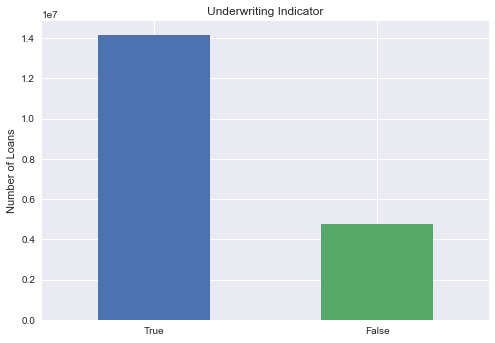

Top  -1  counts:  
 True    14148027
Name: underwritingindicator, dtype: int64


In [65]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

### Create Feature Column Underwriting

In [66]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    14148027
0     4761220
Name: underwriting_true, dtype: int64

### Subvented

Indicate yes or no as to whether a form of subsidy is received on the loan, such as cash incentives or favorable financing for the buyer. 0: No, 1: Yes - Rate Subvention, 2: Yes - Cash Rebate, 98: Yes - Other

In [67]:
df.subvented.unique()

array(['["98"]', '["2"]', '["1"]', '["0"]', '["1","2"]', '["1","98"]',
       '["1"," 2"]', '["1"," 98"]'], dtype=object)

In [68]:
df['subvented']=df.subvented.astype('category')

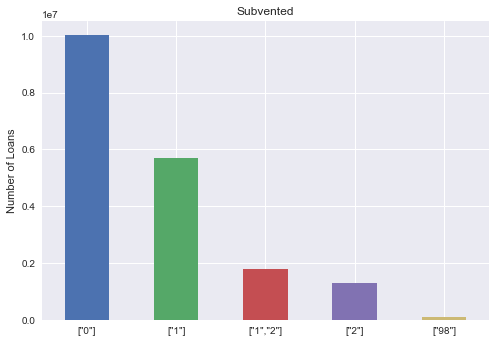

Top  -1  counts:  
 ["0"]         10025739
["1"]          5688505
["1","2"]      1802400
["2"]          1306695
["98"]           82966
["1"," 2"]        2595
["1","98"]         238
Name: subvented, dtype: int64


In [69]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [70]:
df.subvented.describe(include='all')

count     18909247
unique           8
top          ["0"]
freq      10025739
Name: subvented, dtype: object

### Create Feature Column for Subvented

In [71]:
# create feature columns for subvented
def map_subvented(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.subvented).index.tolist()

for code in codes:
        df['subvented_{}'.format(code)] = list(map(map_subvented, df.subvented))
        print('Added Column for :   subvented_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['subvented'], axis=1, inplace=True)

Added Column for :   subvented_["0"]
Added Column for :   subvented_["1"]
Added Column for :   subvented_["1","2"]
Added Column for :   subvented_["2"]
Added Column for :   subvented_["98"]
Added Column for :   subvented_["1"," 2"]
Added Column for :   subvented_["1","98"]
Added Column for :   subvented_["1"," 98"]
New Dataframe shape :  (18909247, 85)


### Vehicle New or Used code

Indicate whether the vehicle financed is new or used at the time of origination. 1: New, 2: Used

In [72]:
df.vehiclenewusedcode.unique()

array([1, 2], dtype=int64)

In [73]:
df['vehiclenewusedcode']=df.vehiclenewusedcode.astype('category')

draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

### Create Feature Column for New or Used

In [75]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
print('Added Column for :   vehiclenew_true')
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

1    11952787
0     6956460
Name: vehiclenew_true, dtype: int64

### Vehicle Type code ---relevancy for machine learning ?

Indicate the code describing the vehicle type. 1: Car, 2:
Truck, 3: SUV, 4: Motorcycle, 98: Other, 99: Unknown

In [76]:
df.vehicletypecode.unique()

array([ 3,  1,  4,  2, 99, 98], dtype=int64)

In [77]:
#df['vehicletypecode']=df.vehicletypecode.astype('category')

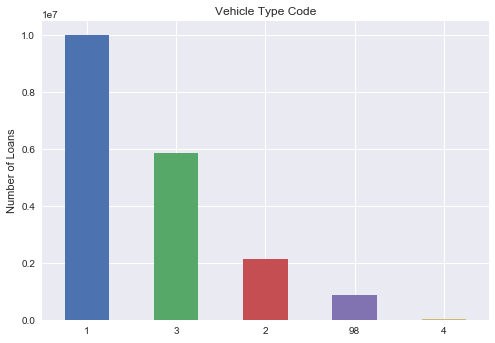

Top  -1  counts:  
 1     9995541
3     5869699
2     2123877
98     884459
4       31419
Name: vehicletypecode, dtype: int64


In [78]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [79]:
df.vehicletypecode.describe()

count     18909247
unique           6
top              1
freq       9995541
Name: vehicletypecode, dtype: int64

In [80]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(18909247, 83)

### Obligor Credit Score Type

Specify the type of the standardized credit score used to
evaluate the obligor during the loan origination process

In [81]:
df.obligorcreditscoretype.unique()

array(['FICO', 'Bureau', 'FICO Score 2 Auto', 'FICO Score 8 Auto',
       'Credit Bureau', 'Consumer Bureau', 'Commercial Bureau',
       'Consumer Credit Bureau', 'Unknown/Invalid', 'CREDIT BUREAU'], dtype=object)

In [82]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('category')

draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [84]:
df.obligorcreditscoretype.describe()

count     18909247
unique          10
top         Bureau
freq       6180333
Name: obligorcreditscoretype, dtype: object

In [85]:
pd.value_counts(df.obligorcreditscoretype==0)

False    18909247
Name: obligorcreditscoretype, dtype: int64

### Create features for obligator credit score type

In [86]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))
        print('Added Column for :   credit_type_'+code)
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape       

### Obligor Credit Score

Provide the standardized credit score of the obligor used to
evaluate the obligor during the loan origination process

In [88]:
#df.obligorcreditscore.isnull().values.any()

In [89]:
#df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

In [90]:
#df.obligorcreditscore.value_counts('NaN').head()

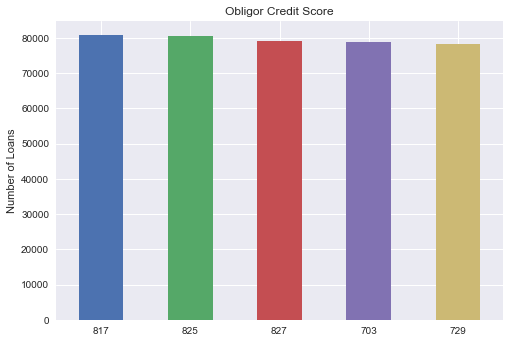

Top  10  counts:  
 817    80756
825    80495
827    79184
703    78787
729    78301
722    77459
795    77319
805    77081
810    76283
815    75127
Name: obligorcreditscore, dtype: int64


In [91]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True, n=10)

In [92]:
df.obligorcreditscore.describe()

count     18092096
unique        1083
top            817
freq         80756
Name: obligorcreditscore, dtype: object

### Remove and Drop rows of Obligor Credit Score with strings('no score', 'none', 'Nan')

In [93]:
#search for strings in the columns
q=df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False).sum()
print('Number of Strings in the Columns : ', q)
if q > 0:
    u=df[df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)].obligorcreditscore.unique()
    print('Strings in data : ', u)
    df=df[~df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)]
else:
    print('No strings in the Obligor Credit Score')
    


C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


Number of Strings in the Columns :  

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


829327
Strings in data :  [nan 'No Score' 'NONE']


C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel\__main__.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [94]:
#Number of blanks in the column
df.obligorcreditscore.astype(str).str.contains(r'^(\s+)$').sum()

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


0

In [95]:
#pd.crosstab(df.reportingperiodendingdate, df.obligorcreditscore)

In [96]:

#df=df[~df.obligorcreditscore.str.contains(r'^([^0-9]*)$', na=False)]

In [97]:
#df.isnull().sum()

cik                                                                     0
assetnumber                                                             0
reportingperiodbeginningdate                                            0
reportingperiodendingdate                                               0
originationdate                                                         0
originalloanamount                                                      0
originalloanterm                                                        0
originalinterestratepercentage                                          0
originalfirstpaymentdate                                                0
graceperiodnumber                                                       0
obligorcreditscore                                                      0
obligorincomeverificationlevelcode                                  22913
obligoremploymentverificationcode                                   22913
coobligorindicator                    

In [98]:
#df.obligorcreditscore.isnull().value_counts()

In [99]:
#df[df.obligorcreditscore.isnull()]

In [100]:
df=df.dropna(subset=['obligorcreditscore'])

In [101]:
df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

817    80756
825    80495
827    79184
703    78787
729    78301
Name: obligorcreditscore, dtype: int64

In [102]:
df.obligorcreditscore.isnull().values.any()

False

In [103]:
#df.dtypes

cik                                                                int64
assetnumber                                                       object
reportingperiodbeginningdate                                      object
reportingperiodendingdate                                         object
originationdate                                                   object
originalloanamount                                               float64
originalloanterm                                                   int64
originalinterestratepercentage                                   float64
originalfirstpaymentdate                                          object
graceperiodnumber                                                  int64
obligorcreditscore                                                object
obligorincomeverificationlevelcode                               float64
obligoremploymentverificationcode                                float64
coobligorindicator                                 

### Obligor Income Verification Level Code

Indicate the code describing the extent to which the
obligor's income was verified during the loan origination
process. 1: Not stated, not verified, 2: Stated, not verified,
3: Stated, verified but not to level 4 or level 5., 4: Stated,
"level 4" verifiedLevel 4 income verification = Previous year
W-2 or tax returns, and year-to-date pay stubs, if salaried. If
self-employed, then obligor provided 2 years of tax returns.,
5: Stated, "level 5" verifiedLevel 5 income verification = 24
months income verification (W-2s, pay stubs, bank
statements and/or tax returns). If self-employed, then
obligor provided 2 years tax returns plus a CPA certification
of the tax returns.

In [104]:
df['obligorincomeverificationlevelcode']=df.obligorincomeverificationlevelcode.astype('category')

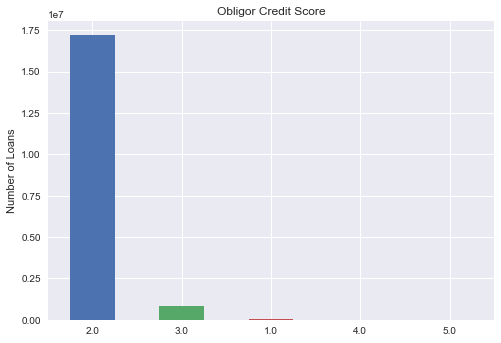

Top  -1  counts:  
 2.0    17203786
3.0      806914
1.0       46176
4.0         110
Name: obligorincomeverificationlevelcode, dtype: int64


In [105]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [106]:
df.obligorincomeverificationlevelcode.describe()

count     18057007.0
unique           5.0
top              2.0
freq      17203786.0
Name: obligorincomeverificationlevelcode, dtype: float64

In [107]:
pd.value_counts(df.obligorincomeverificationlevelcode)

2.0    17203786
3.0      806914
1.0       46176
4.0         110
5.0          21
Name: obligorincomeverificationlevelcode, dtype: int64

In [108]:
u=pd.value_counts(df.obligorincomeverificationlevelcode==0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

No blank or zero obligor income verification level code


(18079920, 92)

### Create Feature Columns for Obligor Income Verification Code

In [109]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))
        print('Added Column for :   income_code_'+code)
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)
df.shape()

### Obligor Employment Verification Code

Indicate the code describing the extent to which the
obligor's employment was verified during the loan
origination process. 1: Not stated, not verified, 2: Stated,
not verified, 3: Stated, level 3 verified Level 3 verified =
Direct independent verification with a third party of the
obligors current employment.

In [111]:
df['obligoremploymentverificationcode']=df.obligoremploymentverificationcode.astype('category')

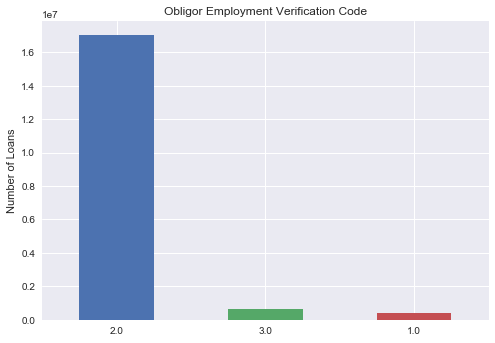

Top  -1  counts:  
 2.0    17024162
3.0      651429
Name: obligoremploymentverificationcode, dtype: int64


In [112]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [113]:
#pd.value_counts(df.obligoremploymentverificationcode==0)

In [114]:
df.obligoremploymentverificationcode.describe()

count     18057007.0
unique           3.0
top              2.0
freq      17024162.0
Name: obligoremploymentverificationcode, dtype: float64

In [115]:
u=pd.value_counts(df.obligoremploymentverificationcode==0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

No blank or zero obligor employment verification level code


(18079920, 96)

### Create feature Columns for obligor employment verification

In [116]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))
        print('Added Column for :   empl_code_'+code)
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)
df.shape()

### Co-obligator Indicator

Indicate whether the loan has a co-obligor.

In [118]:
df['coobligorindicator']=df.coobligorindicator.astype('category')

In [119]:
df.coobligorindicator.describe()

count     18079920
unique           2
top          False
freq      12050688
Name: coobligorindicator, dtype: object

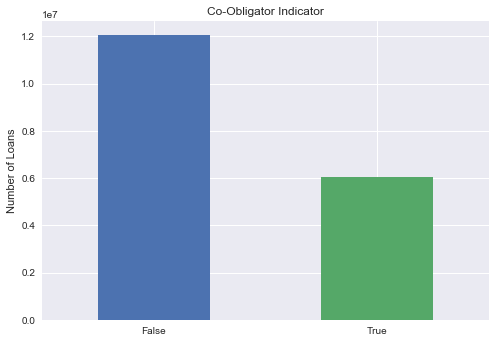

Top  -1  counts:  
 False    12050688
Name: coobligorindicator, dtype: int64


In [120]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

### Create features for Co-obligator Indicator

In [121]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
print('Added Column for :   coobligorindicator_true')
pd.value_counts(df.coobligorindicator_true)

0    12050688
1     6029232
Name: coobligorindicator_true, dtype: int64

### Reporting Period Actual End Balance Amount

Mean reporting period actual end balance amount by the reporting period ending date

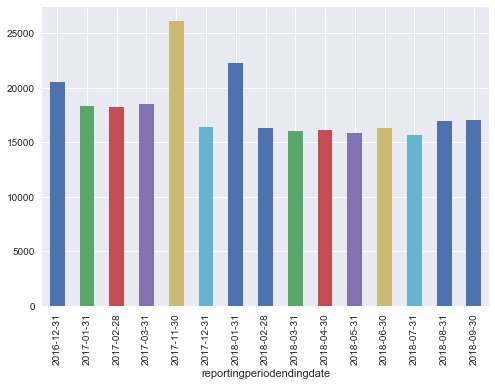

In [122]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

In [123]:
#draw(df.reportingperiodactualendbalanceamount, title='Reporting Period Actual End Balance Amount', ylabel='Number of Loans', sort=True)

In [124]:
df.reportingperiodactualendbalanceamount.describe()

count    1.807992e+07
mean     1.638287e+04
std      9.936905e+03
min     -9.978260e+03
25%      9.723740e+03
50%      1.557705e+04
75%      2.200000e+04
max      2.111091e+05
Name: reportingperiodactualendbalanceamount, dtype: float64

### Dropping loans with zero or negative reporting period actual end balance amount

In [125]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

Number of loans with no reporting period actual end balance amount : 777590
Dropping  777590 rows and retaining loans with reporting period actual end balance amount


(17302330, 98)

### Total Actual amount paid

In [126]:
df.totalactualamountpaid.describe()

count    1.728332e+07
mean     4.585619e+02
std      6.314416e+02
min     -7.203197e+04
25%      2.989400e+02
50%      4.041800e+02
75%      5.500000e+02
max      2.041267e+05
Name: totalactualamountpaid, dtype: float64

In [127]:
u=pd.value_counts(df.totalactualamountpaid<=0)
if len(u)<2:
    print('No blank or zero or negative total actual amount paid')
else: 
    print('Number of loans with no or negative total actual amount paid',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.totalactualamountpaid>0]
df.shape

Number of loans with no or negative total actual amount paid : 1818036


(17302330, 98)

### Actual interest collected amount

In [128]:
df.actualinterestcollectedamount.describe()

count    1.728332e+07
mean     9.196977e+01
std      1.472337e+02
min     -1.303820e+03
25%      2.460000e+00
50%      3.151000e+01
75%      1.072700e+02
max      4.767940e+03
Name: actualinterestcollectedamount, dtype: float64

In [129]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

Number of loans with no or negative actual interest collected amount : 4165819


(17302330, 98)

### Actual principal collected amount

In [130]:
df.actualprincipalcollectedamount.describe()

count    1.728332e+07
mean     3.659767e+02
std      6.193506e+02
min     -7.203197e+04
25%      1.810900e+02
50%      3.275100e+02
75%      4.649600e+02
max      2.031540e+05
Name: actualprincipalcollectedamount, dtype: float64

In [131]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

Number of loans with zero or negative actual principal collected amount : 2331478


(17302330, 98)

### Interest paid through date

In [132]:
pd.value_counts(df.interestpaidthroughdate).head(n=10)

1900-01-01    1323367
2018-06-15     133433
2018-06-29     106512
2018-06-01     103529
2018-03-30     102848
2018-05-15     102675
2018-03-15      99464
2018-04-20      98659
2018-05-25      95999
2018-04-13      92514
Name: interestpaidthroughdate, dtype: int64

In [133]:
df.interestpaidthroughdate.describe()

count       16327098
unique          2077
top       1900-01-01
freq         1323367
Name: interestpaidthroughdate, dtype: object

### Dropping interest paid through date '1900-01-01'

In [134]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

Number of loans with zero or 1900-01-01 as  interest paid throughdate : 1323367


(17302330, 98)

In [135]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

(17302330, 97)

### Number of Days from origination to first payment date

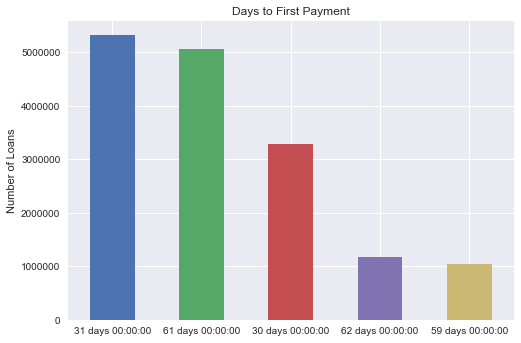

Top  -1  counts:  
 31 days     5317183
61 days     5059186
30 days     3281136
62 days     1179886
59 days     1044228
28 days      601183
92 days      258872
60 days      185034
91 days      127794
29 days      104096
90 days       78611
0 days        41556
89 days       20651
120 days       2347
122 days        359
-31 days        136
121 days         29
123 days         16
-62 days         14
-30 days         11
Name: daystofirstpayment, dtype: int64


In [136]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True, n=5)


In [137]:
df.daystofirstpayment.describe()

count                   17302330
mean     45 days 05:05:40.274864
std      17 days 00:10:32.333318
min           -62 days +00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             61 days 00:00:00
max            153 days 00:00:00
Name: daystofirstpayment, dtype: object

### Create a new feature for number of days to first payment

In [138]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

19999995    31
19999996    31
19999997    31
19999998    31
19999999    31
Name: daystofirstpayment, dtype: int64

### Number of loans with zero days to first payment

In [139]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

Number of loans with zero days to first payment : 41556


(17302330, 98)

In [140]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

(17302330, 97)

### Grace Period

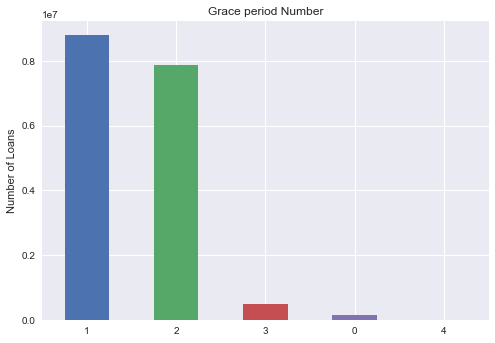

Top  -1  counts:  
 1    8797229
2    7859279
3     492198
0     151067
4       2555
Name: graceperiodnumber, dtype: int64


In [141]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [142]:
df.graceperiodnumber.describe()

count    1.730233e+07
mean     1.502839e+00
std      5.702940e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: graceperiodnumber, dtype: float64

### Number of loans with zero grace period

In [143]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

Number of loans with zero grace period number : 151067


(17302330, 97)

### Asset added indicator

Indicate yes or no whether the asset was added during the
reporting period. Instruction: A response to this data point
is only required when assets are added to the asset pool
after the final prospectus is filed

In [144]:
df['assetaddedindicator']=df.assetaddedindicator.astype('category')

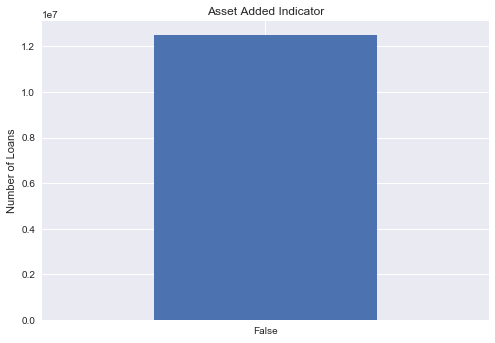

Top  -1  counts:  
 Series([], Name: assetaddedindicator, dtype: int64)


In [145]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Proportion of Loans', sort = False, n=2)

In [146]:
df.assetaddedindicator.describe()

count     12499456
unique           1
top          False
freq      12499456
Name: assetaddedindicator, dtype: object

In [147]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

Number of loans with zero or blank Asset Added Indicator : 4802874


(17302330, 97)

In [148]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

(17302330, 96)

### Reporting Period Modification Indicator

Indicates yes or no whether the loan was modified from its
original terms during the reporting period.

In [149]:
df['reportingperiodmodificationindicator']=df.reportingperiodmodificationindicator.astype('category')

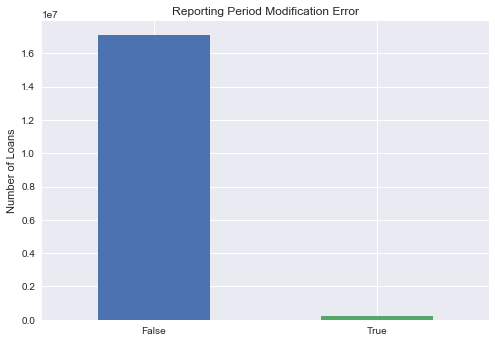

Top  -1  counts:  
 False    17091024
Name: reportingperiodmodificationindicator, dtype: int64


In [150]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Proportion of Loans', sort = True)

In [151]:
df.reportingperiodmodificationindicator.describe()

count     17302329
unique           2
top          False
freq      17091024
Name: reportingperiodmodificationindicator, dtype: object

### Create Features for Reporting Period Modification Indicator True

In [152]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
print('Added Column for :   reportingperiodmodificationindicator_true')
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

0    17091025
1      211305
Name: reportingperiodmodificationindicator_true, dtype: int64

In [153]:
df.shape

(17302330, 96)

### Servicing Advance Method Code

Specify the code that indicates a servicer's responsibility for
advancing principal or interest on delinquent loans. 1: No
advancing, 2: Interest only, 3: Principal only, 4: Principal and
Interest, 99: Unavailable

In [154]:
df['servicingadvancemethodcode']=df.servicingadvancemethodcode.astype('category')

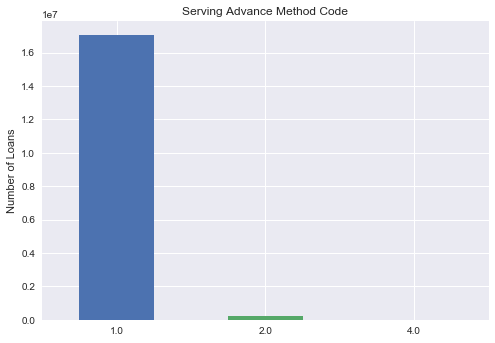

Top  -1  counts:  
 1.0    17044370
2.0      247705
Name: servicingadvancemethodcode, dtype: int64


In [155]:
draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True)

In [156]:
df.servicingadvancemethodcode.describe()

count     17302330.0
unique           3.0
top              1.0
freq      17044370.0
Name: servicingadvancemethodcode, dtype: float64

### Create Feature Columns for Servicing Advance Method Codes

In [157]:
def map_servicingadvancemethodcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

for code in codes:
        df['servicingadvancemethod_code_{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))
        print('Added Column for :   servicingadvancemethod_code_'+code)
df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
df.shape

### Other Principal Adjustment Amount

In [159]:
df.otherprincipaladjustmentamount.describe()

count    1.730233e+07
mean    -1.952782e+01
std      8.448026e+02
min     -7.466276e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.299528e+04
Name: otherprincipaladjustmentamount, dtype: float64

In [160]:
u=pd.value_counts(df.otherprincipaladjustmentamount!=True)
if len(u)<2:
    print('No blank other principal adjustment amount')
else: 
    print('Number of loans with zero other principal adjustment amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
    #df=df[df.otherprincipaladjustmentamount>0]
df.shape

Number of loans with zero other principal adjustment amount : 17302170


(17302330, 98)

### Zero Balance Effective Date

Provide the date on which the loan balance was reduced to
zero.

In [161]:
df.zerobalanceeffectivedate.describe()

count            974
unique            10
top       2018-01-31
freq             179
Name: zerobalanceeffectivedate, dtype: object

### Adding new features for Days to Zero Balance Effective Date from Origination Date

In [162]:
for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
    if i>cutOffForOriginationDate:
        df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
print('Added Column for :   zerobalanceeffectivedate_calc')
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [163]:
df.zerobalanceeffectivedate_calc.describe()

count     974.000000
mean      500.667351
std       313.446711
min        30.000000
25%       274.000000
50%       485.000000
75%       639.000000
max      1916.000000
Name: zerobalanceeffectivedate_calc, dtype: float64

In [164]:
# fill NaN values with zeros
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [165]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

(17302330, 98)

### Zero Balance Code

Provide the code that indicates the reason the loan's
balance was reduced to zero. 1: Prepaid or Matured, 2:
Third-party Sale, 3: Repurchased or Replaced, 4: Chargedoff,
5: Servicing Transfer, 99: Unavailable

In [166]:
df['zerobalancecode']=df.zerobalancecode.astype('category')

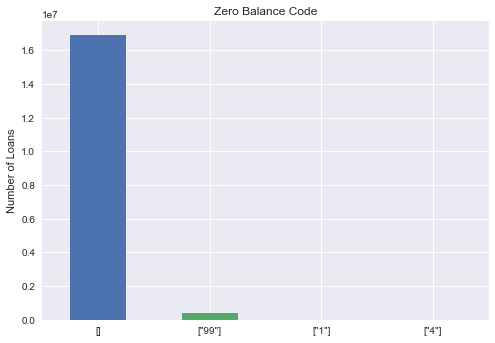

Top  -1  counts:  
 []        16907514
["99"]      393842
["1"]          960
Name: zerobalancecode, dtype: int64


In [167]:
draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True)

### Create feature column for zero balance code

In [168]:
def map_zerobalancecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.zerobalancecode).index.tolist()

for code in codes:
        df['zerobalance_{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))
        print('Added Column for :   zerobalance_'+code)
df.drop(['zerobalancecode'], axis=1, inplace=True)
df.shape

In [171]:
# df.set_index('originationdate')
# df.sort_values(by='originationdate', ascending=True)

## Add External S&P Experian default index and historical data

In [172]:
df=df.set_index('reportingperiodendingdate')

In [173]:
df1=pd.read_csv(path+'datasets/s&pExperianAutoDefaultIndex.csv', index_col=0)
df=df.join(df1)
df2=pd.read_csv(path+'datasets/experianHistDefaultRates.csv', index_col=0)
df=df.join(df2)

In [174]:
df.head()

,cik,assetnumber,reportingperiodbeginningdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,...,zerobalance_code[],"zerobalance_code[""99""]","zerobalance_code[""1""]","zerobalance_code[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
2016-12-31,1694276,3312469,2016-12-01,2016-10-31,19339.41,60,5.39,0,710,0.0682,...,1,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364684,2016-12-01,2016-10-31,17955.27,60,8.99,1,654,0.0792,...,1,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364692,2016-12-01,2016-10-31,14815.00,72,9.55,0,707,0.0372,...,1,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364718,2016-12-01,2016-10-31,13186.31,60,9.90,1,622,0.0488,...,1,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364734,2016-12-01,2016-10-31,16400.00,48,10.90,0,656,0.0829,...,1,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92


In [175]:
df.drop(['cik', 'assetnumber', 'reportingperiodbeginningdate','originationdate'], axis=1, inplace=True)
df.shape
        

(17302330, 102)

# Clean data

In [176]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [177]:
df.isnull().values.any()

True

# Loan Statistics

In [178]:
df.describe()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,servicingfeepercentage,...,zerobalance_code[],"zerobalance_code[""99""]","zerobalance_code[""1""]","zerobalance_code[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
count,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.724297e+07,1.728079e+07,1.725741e+07,1.730154e+07,1.730154e+07,1.730233e+07,...,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07,1.730233e+07
mean,2.428780e+04,6.659573e+01,1.556459e-01,1.502839e+00,1.133885e+00,1.745285e+04,4.992643e+02,2.322092e-01,2.322092e-01,5.234222e-02,...,9.771813e-01,2.276237e-02,5.548386e-05,8.091396e-07,9.708901e-03,9.865052e-01,3.654231e+00,6.666839e-01,6.591004e-01,8.961008e-01
std,1.013864e+04,8.425659e+00,6.905820e-01,5.702940e-01,4.065185e+01,9.569933e+03,4.853595e+02,1.090127e+00,1.090126e+00,1.864605e-01,...,1.493251e-01,1.491450e-01,7.448542e-03,8.995215e-04,5.660996e-04,6.235218e-02,2.029891e-01,3.160004e-02,1.914183e-01,3.658019e-02
min,7.209300e+02,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.537913e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.900000e-03,8.900000e-01,3.140000e+00,6.300000e-01,4.800000e-01,8.200000e-01
25%,1.717314e+04,6.100000e+01,9.000000e-03,1.000000e+00,5.210000e-02,1.088249e+04,2.650000e+02,9.000000e-03,9.000000e-03,1.000000e-02,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e-03,9.300000e-01,3.520000e+00,6.300000e-01,5.700000e-01,8.600000e-01
50%,2.292256e+04,7.200000e+01,3.740000e-02,1.000000e+00,8.682788e-02,1.635123e+04,4.117100e+02,3.750000e-02,3.750000e-02,1.000000e-02,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e-03,9.700000e-01,3.710000e+00,6.600000e-01,5.900000e-01,8.900000e-01
75%,2.978572e+04,7.300000e+01,1.399000e-01,2.000000e+00,1.392000e-01,2.271053e+04,6.062600e+02,1.460000e-01,1.460000e-01,3.000000e-02,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e-03,9.900000e-01,3.840000e+00,6.800000e-01,5.900000e-01,9.200000e-01
max,2.432811e+05,8.600000e+01,2.299000e+01,5.000000e+00,8.121600e+04,2.128795e+05,1.705755e+04,2.400000e+01,2.400000e+01,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e-02,1.110000e+00,3.860000e+00,7.500000e-01,1.220000e+00,9.600000e-01


## Deliquency Buckets Current Vs Non-Current

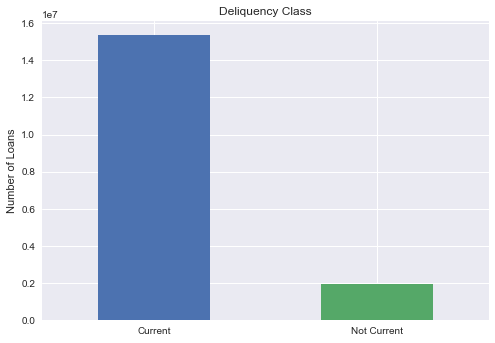

Number of loans Current : 15367237     Number of loans Not Current : 1935093


In [179]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [180]:
#pd.value_counts(df.currentdelinquencystatus)

In [181]:
df.currentdelinquencystatus.describe()

count    1.730081e+07
mean     2.581539e+00
std      1.053865e+01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.490000e+02
Name: currentdelinquencystatus, dtype: float64

In [182]:
u=pd.value_counts(df.currentdelinquencystatus==''.index) 
if len(u)<2:
    print('No blank current delinquency status')
else: 
    print('Number of loans with blank current delinquency status',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

No blank current delinquency status


(17302330, 102)

## Label Creation for Machine Learning

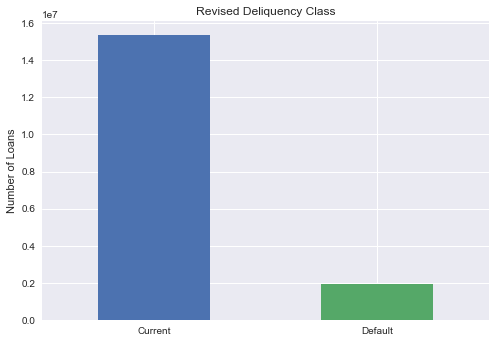

Number of loans Current : 15365715     Number of loans Defaulted : 1935093


In [183]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        elif column == 0:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

### Loan Balance Amount at the End of Reporting Period

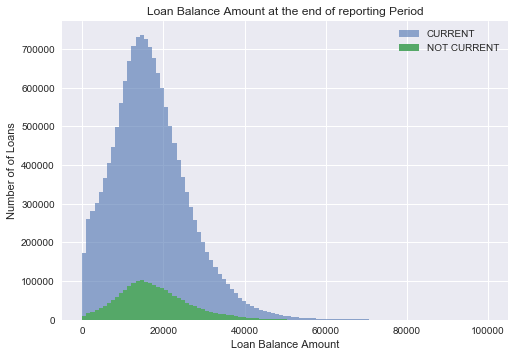

In [184]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, 
         #density=True, 
         label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, 
         #density=True, 
         label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Number of of Loans')
plt.show()

### Manual oversampling of default data 

default:  (1935093, 103)
copy default data  7  times
0


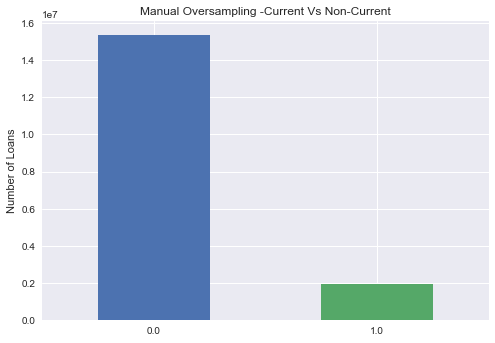

Top  -1  counts:  
 0.0    15365715
Name: label, dtype: int64
(17302330, 103)
False    15367237
True      1935093
Name: label, dtype: int64


In [185]:
#def manual_oversampling(df):
default=df[df.label==1]
print('default: ',default.shape)
b=int((df.shape[0]-default.shape[0])/(default.shape[0]))
print('copy default data ',b, ' times')
b=int(b*manualOversamplingFactor)
print(b)
for i in range(b):
    df=df.append(default, ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)
draw(df.label, title='Manual Oversampling -Current Vs Non-Current', ylabel='Number of Loans', sort=True)
print(df.shape)
print(pd.value_counts(df.label==1))
#return df
   

In [186]:
#manual_oversampling(df)
print(pd.value_counts(df.label==1))
df.shape

False    15367237
True      1935093
Name: label, dtype: int64


(17302330, 103)

In [187]:
#df.dtypes

originalloanamount                           float64
originalloanterm                               int64
originalinterestratepercentage               float64
graceperiodnumber                              int64
obligorcreditscore                            object
paymenttoincomepercentage                    float64
reportingperiodbeginningloanbalanceamount    float64
nextreportingperiodpaymentamountdue          float64
reportingperiodinterestratepercentage        float64
nextinterestratepercentage                   float64
servicingfeepercentage                       float64
servicingflatfeeamount                       float64
otherservicerfeeretainedbyservicer           float64
otherassesseduncollectedservicerfeeamount    float64
scheduledinterestamount                      float64
scheduledprincipalamount                     float64
otherprincipaladjustmentamount               float64
reportingperiodactualendbalanceamount        float64
reportingperiodscheduledpaymentamount        f

### Oversampling with SMOTE

In [188]:
# from imblearn.over_sampling import SMOTE, ADASYN
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [189]:
# #Apply SMOTE to create synthetic observations from minority class
# #Source:https://github.com/scikit-learn-contrib/imbalanced-learn
# from imblearn.over_sampling import SMOTE #Over sampling
# sm = SMOTE(ratio='auto',kind='regular')
# X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

# #Percentage of fraudlent records in original data
# Source_data_no_fraud_count = len(data[data.Class==0])
# Source_data_fraud_count = len(data[data.Class==1])
# print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

# #Percentage of fraudlent records in sampled data
# Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
# Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
# print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

### Naive Random Oversampling

In [190]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

#  Clean up for Machine Learning

In [191]:
df.shape

(17302330, 103)

In [192]:
#df=df.replace([np.inf, -np.inf], np.nan)
#df=df.fillna(0, inplace=True)
#df=df.dropna(inplace=True)
#df.head()
df.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,"zerobalance_code[""99""]","zerobalance_code[""1""]","zerobalance_code[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,label
0,18989.04,72,0.1835,1,742,0.073975,18989.04,458.68,0.1835,0.1835,...,0,0,0,0.0105,1.09,3.64,0.72,0.80,0.96,0.0
1,27316.75,74,0.0000,2,760,0.108400,15100.00,0.00,0.0000,0.0000,...,0,0,0,0.0097,0.96,3.56,0.63,0.59,0.86,0.0
2,23059.00,74,0.0290,2,761,0.102900,14633.82,0.00,0.0290,0.0290,...,0,0,0,0.0093,0.93,3.84,0.66,0.57,0.89,0.0
3,23238.72,73,0.0320,1,745,0.179200,21203.08,0.00,0.0320,0.0320,...,0,0,0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0
4,50083.30,65,4.9700,0,774,14.180000,37523.45,0.00,5.0806,5.0806,...,1,0,0,0.0110,1.11,3.28,0.66,1.08,0.89,0.0


In [193]:
df.isnull().any()

originalloanamount                           False
originalloanterm                             False
originalinterestratepercentage               False
graceperiodnumber                            False
obligorcreditscore                           False
paymenttoincomepercentage                     True
reportingperiodbeginningloanbalanceamount     True
nextreportingperiodpaymentamountdue           True
reportingperiodinterestratepercentage         True
nextinterestratepercentage                    True
servicingfeepercentage                       False
servicingflatfeeamount                        True
otherservicerfeeretainedbyservicer            True
otherassesseduncollectedservicerfeeamount     True
scheduledinterestamount                       True
scheduledprincipalamount                      True
otherprincipaladjustmentamount               False
reportingperiodactualendbalanceamount        False
reportingperiodscheduledpaymentamount         True
totalactualamountpaid          

In [194]:
df.isnull().any().sum()

18

In [195]:
pd.value_counts(df.label, dropna=False)

 0.0    15365715
 1.0     1935093
NaN         1522
Name: label, dtype: int64

In [196]:
df.label.fillna(0, inplace=True)

In [197]:
pd.value_counts(df.label, dropna=False)

0.0    15367237
1.0     1935093
Name: label, dtype: int64

In [198]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

 0.00    150179
NaN       59363
 0.05     14081
 0.06     12108
 0.04     12001
Name: paymenttoincomepercentage, dtype: int64

In [199]:
df.paymenttoincomepercentage.dropna(inplace=True)

In [200]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

0.00    150179
0.05     14081
0.06     12108
0.04     12001
0.07     10181
Name: paymenttoincomepercentage, dtype: int64

In [201]:
df['servicingflatfeeamount']=df.servicingflatfeeamount.astype('float')
pd.value_counts(df.servicingflatfeeamount, dropna=False) 

NaN     16659823
 0.0      642507
Name: servicingflatfeeamount, dtype: int64

In [202]:
df.servicingflatfeeamount.fillna(0,inplace=True)

In [203]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

NaN         21539
 0.0        13248
 10000.0     1303
 12000.0     1052
 14000.0      923
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

In [204]:
df.reportingperiodbeginningloanbalanceamount.fillna(0, inplace=True)

In [205]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

0.0        34787
10000.0     1303
12000.0     1052
14000.0      923
5000.0       921
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

In [206]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

NaN      16659823
 0.0       638769
 15.0          77
 20.0          30
 30.0          27
Name: otherservicerfeeretainedbyservicer, dtype: int64

In [207]:
df.otherservicerfeeretainedbyservicer.fillna(0, inplace=True)

In [208]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

0.0     17298592
15.0          77
20.0          30
30.0          27
45.0          15
Name: otherservicerfeeretainedbyservicer, dtype: int64

In [209]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

NaN      11799191
 0.00     5468122
 1.97           9
 0.67           7
 0.95           7
Name: serviceradvancedamount, dtype: int64

In [210]:
df.serviceradvancedamount.fillna(0, inplace=True)

In [211]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

0.00     17267313
1.97            9
0.67            7
0.95            7
11.93           6
Name: serviceradvancedamount, dtype: int64

In [212]:
df.isnull().any()

originalloanamount                           False
originalloanterm                             False
originalinterestratepercentage               False
graceperiodnumber                            False
obligorcreditscore                           False
paymenttoincomepercentage                     True
reportingperiodbeginningloanbalanceamount    False
nextreportingperiodpaymentamountdue           True
reportingperiodinterestratepercentage         True
nextinterestratepercentage                    True
servicingfeepercentage                       False
servicingflatfeeamount                       False
otherservicerfeeretainedbyservicer           False
otherassesseduncollectedservicerfeeamount     True
scheduledinterestamount                       True
scheduledprincipalamount                      True
otherprincipaladjustmentamount               False
reportingperiodactualendbalanceamount        False
reportingperiodscheduledpaymentamount         True
totalactualamountpaid          

In [213]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

 0.00    150179
NaN       59363
 0.05     14081
 0.06     12108
 0.04     12001
Name: paymenttoincomepercentage, dtype: int64

In [214]:
df.dropna(inplace=True)

In [215]:
#df.isnull().any().sum()

In [216]:
df.shape 

(17165336, 103)

### Preparing data for Machine Learning

In [217]:
# prepare label for scikit-learn
Y=df.label.values
Y.shape

(17165336,)

In [218]:
# reshape labels for machine learning
#Y=Y.reshape(Y.shape[0],1)
Y.shape

(17165336,)

In [219]:
# prepare input data for scikit-learn
input=df.values
input.shape

(17165336, 103)

In [220]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

13732268


In [221]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [222]:
#reshape input data for machine learning
#input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

(17165336, 103)

In [223]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]
x_train.shape

(13732268, 103)

### Scikit-Learn Scaling

In [224]:
#from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [225]:
x_scaler=StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Keras Scaling - Normalize

In [226]:
# x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
# x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
# x_train_keras_scaled.shape

### Linear Support Vector Machine Algorithm

In [227]:
# from sklearn import svm, neighbors
# lsvc=svm.LinearSVC()
# clf_lsvc=lsvc.fit(x_train, y_train)
# confidence_lsvc=clf_lsvc.score(x_test, y_test)

### K-Nearest Neighbors Algorithm

In [228]:
# knn=neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
# clf_knn=knn.fit(x_train, y_train)
# confidence_knn=clf_knn.score(x_test, y_test)

### Random Forest Tree Algorithm

In [229]:
rfor=RandomForestClassifier()
clf_rfor = rfor.fit(x_train, y_train)
confidence_rfor=clf_rfor.score(x_test, y_test)

### Logistic Regression Algorithm

In [230]:
# lr = LogisticRegression(solver='lbfgs')
# clf_lr = lr.fit(x_train, y_train)
# confidence_lr=clf_lr.score(x_test, y_test)

### Gaussian Naive Bayes Algorithm

In [231]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# clf_gnb = gnb.fit(x_train, y_train)
# confidence_gnb=clf_gnb.score(x_test, y_test)

### Deep Learning - GRU

In [232]:

# model = keras.Sequential()
# model.add(keras.layers.GRU(128, activation='relu',  
#                            kernel_regularizer=regularizers.l2(0.01), 
#                            input_shape=(x_train_keras_scaled.shape[1:]), 
#                            return_sequences=True))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GRU(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(2, activation='softmax'))

# optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
# model.summary()

### Model Configuration

In [233]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

### Train the Model

In [234]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test_keras_scaled, y_test), batch_size=254, 
#         # callbacks = [
#    # baseLogger,
#     #history,
#     #tensorboard
#     #learningRateScheduler,
#     #reduceLROnPlateau
#      #    ], 
#           shuffle=False
# )


### Save the Model

In [235]:
# model.save(path+'model/'+name+'.h5')

In [236]:
# test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

In [237]:
# y_pred = model.predict_classes(x_test)

In [238]:
#print(y_pred)

In [239]:
#len(y_pred)

In [240]:
# np.count_nonzero(y_pred)

In [241]:
# np.count_nonzero(y_test)

### Load Saved Model

In [242]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [243]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

### Predict Classes

In [244]:
x_pred = x_test

In [245]:
#prediction_gru = model.predict_classes(x_pred)
# prediction_lsvc = clf_lsvc.predict(x_pred)
# prediction_knn = clf_knn.predict(x_pred)
prediction_rfor = clf_rfor.predict(x_pred)
# prediction_lr = clf_lr.predict(x_pred)
# prediction_gnb = clf_gnb.predict(x_pred)

In [246]:
predictions = [
  # prediction_gru,
#     prediction_lsvc,
#     prediction_knn,
    prediction_rfor,
#     prediction_lr,
#     prediction_gnb 
]

### Confusion Matrix

ROC_AUC_SCORE ;  1.0
Confusion matrix, without normalization
[[3048533       0]
 [      0  384535]]
Confusion matrix, without normalization
[[3048533       0]
 [      0  384535]]


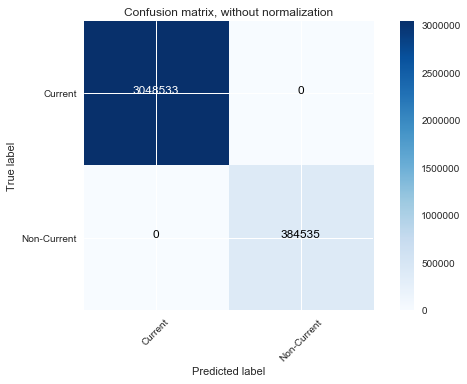

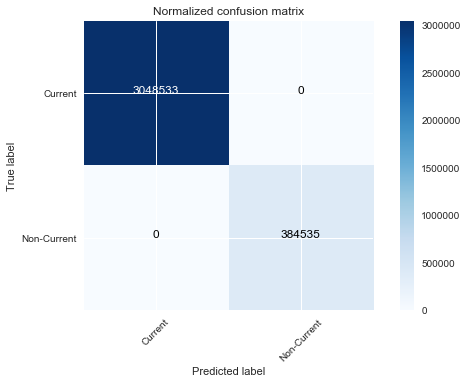

In [247]:
class_names = ['Current', 'Non-Current']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

for prediction in predictions:
        print('ROC_AUC_SCORE ; ', roc_auc_score(y_test, prediction))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, prediction)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title= 'Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                          title='Normalized confusion matrix')

        plt.show()

In [248]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=2)
# metrics.auc(fpr, tpr)

In [249]:
#1. find any string which has no numbers 

#2. find only numbers r'^([0-9]*)$'

#3. find only blanks(empty strings) r'^(\s+)$'

In [250]:
#at least one Nan in a row
# df1=df[df.isnull().any(axis=1)]
# df.isna()
# df.notna()
# df.loc[:,df.isna().any]

In [251]:
# #replace NaN with zero
# df.fillna(0, inplace=True)